<a href="https://colab.research.google.com/github/IgnatiusHope4/ML-exploratory/blob/main/fcc_Magic_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols =['length','width','size','conc','conc1','asym','m3long','m3trans','alpha','dist','class']
df= pd.read_csv('magic04.data',names=cols)
df.head()

,length,width,size,conc,conc1,asym,m3long,m3trans,alpha,dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


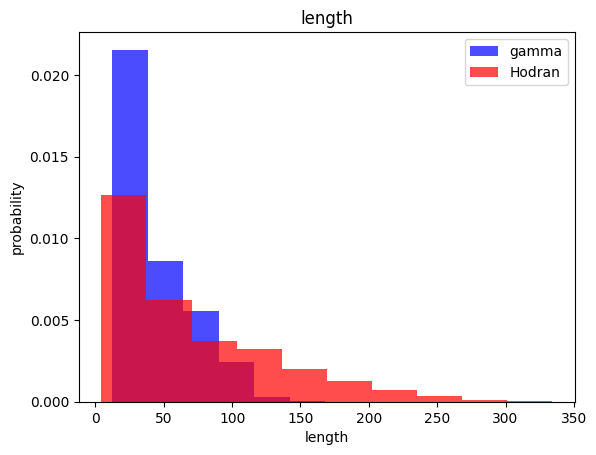

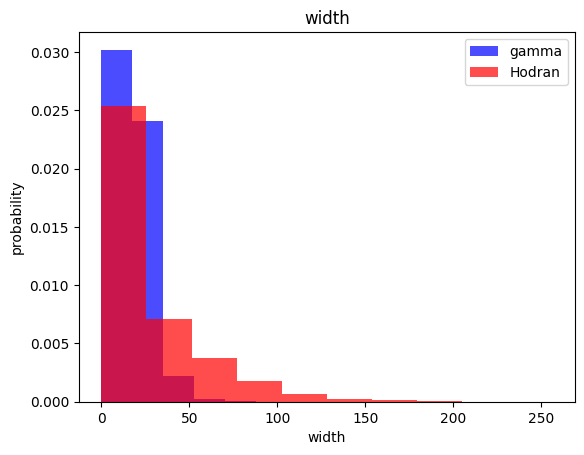

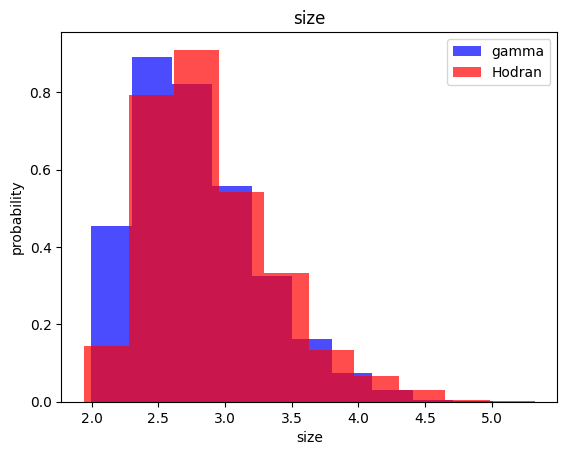

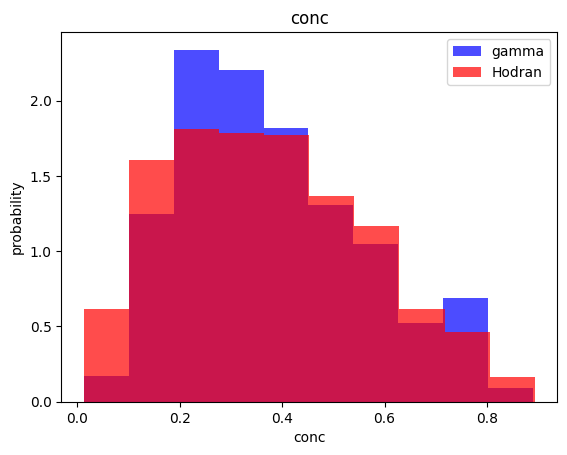

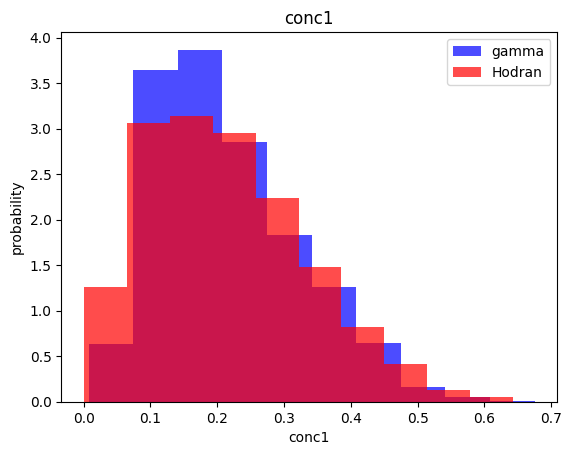

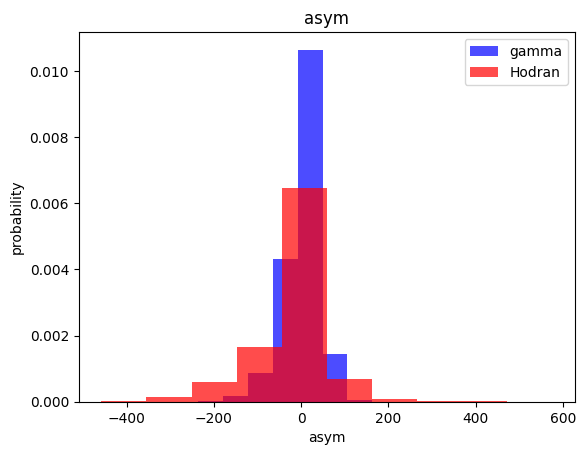

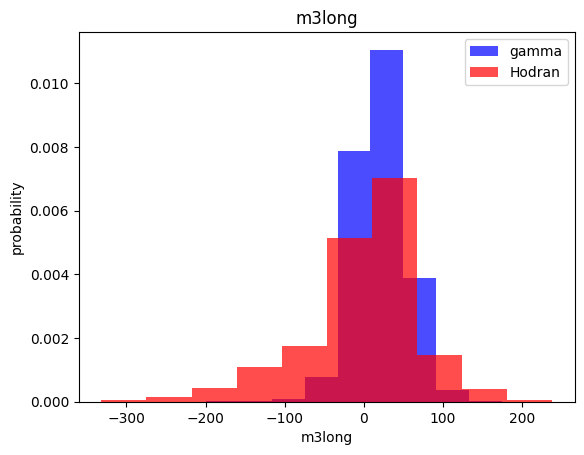

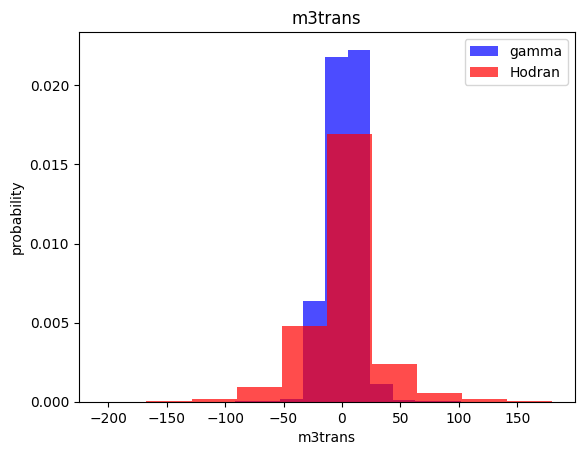

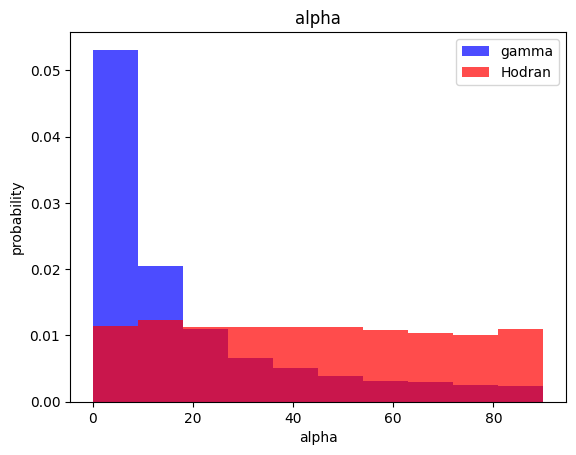

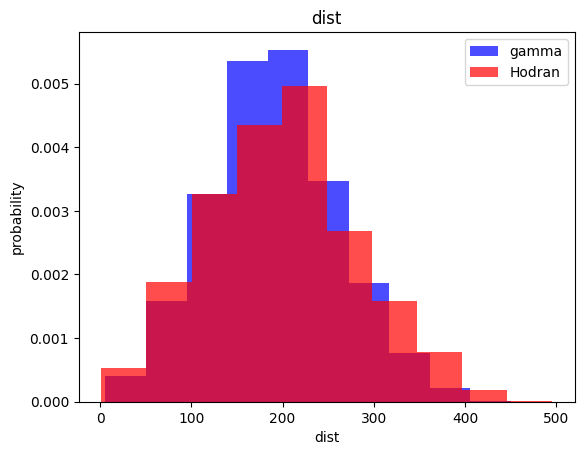

In [3]:
df['class'] =(df['class']=='g').astype(int)

In [4]:
df.head()

,length,width,size,conc,conc1,asym,m3long,m3trans,alpha,dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


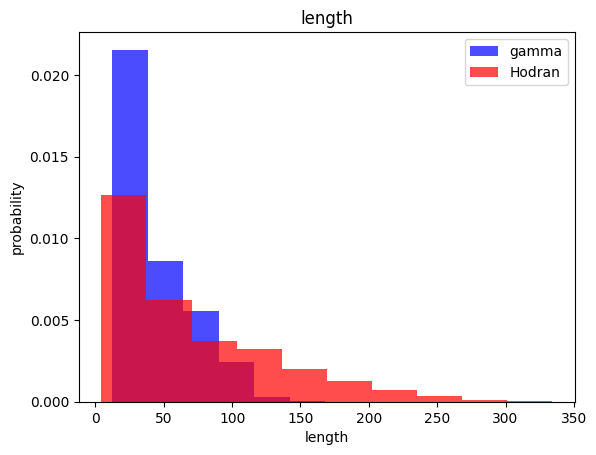

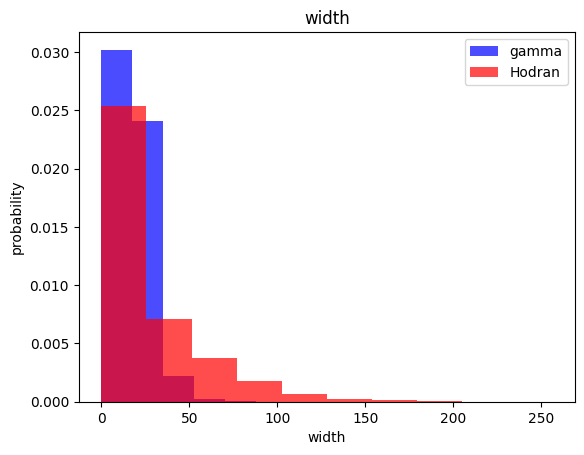

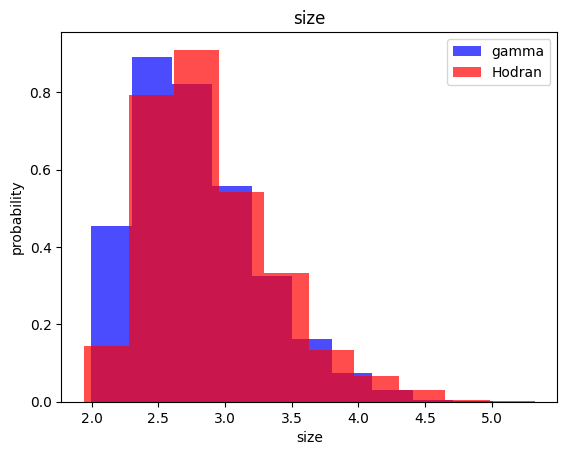

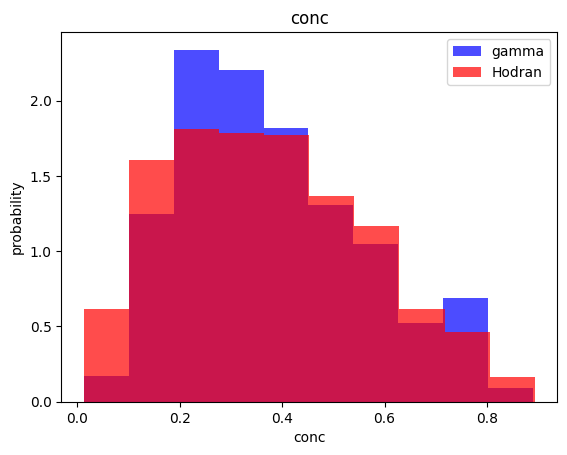

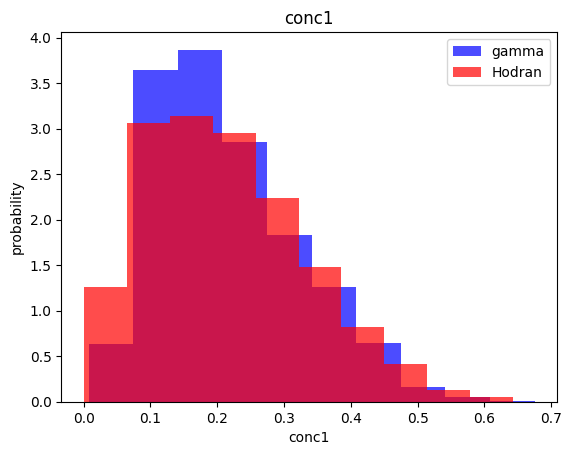

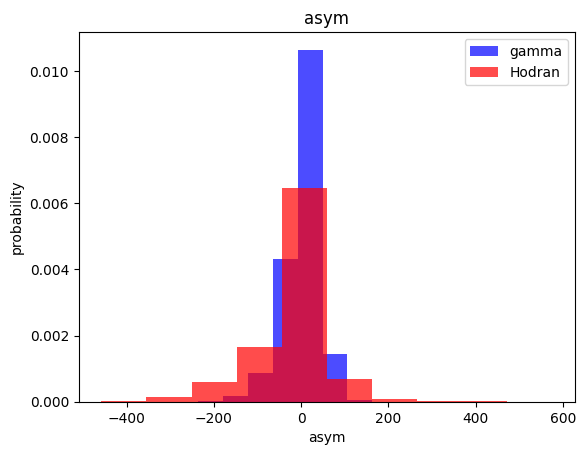

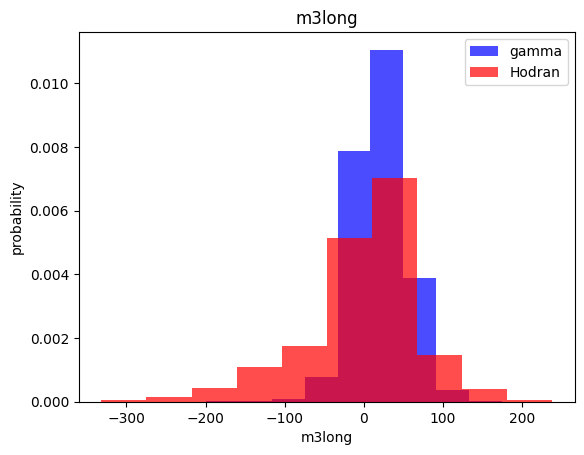

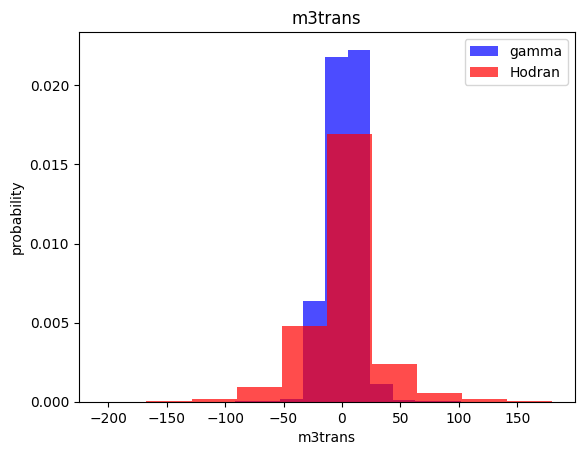

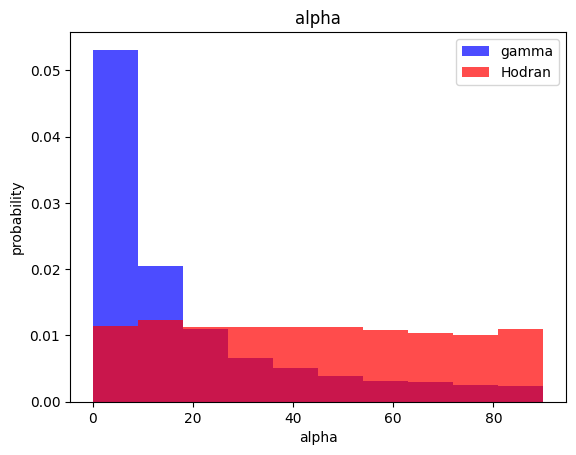

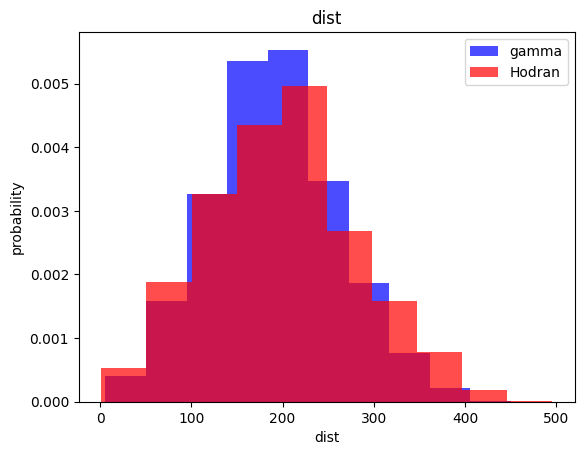

In [5]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label],color='blue',label='gamma',alpha=0.7, density=True)
  plt.hist(df[df['class']==0][label],color='red',label='Hodran',alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, Valid, Test Datasets

In [6]:
train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

In [7]:
def scale_dataset(dataframe, oversample= False):
  x= dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x=scaler.fit_transform(x)

  if oversample:
    ros= RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  data = np.hstack((x, np.reshape(y,(-1,1))))
  return data, x, y


In [8]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=True)
test, x_test, y_test = scale_dataset(test, oversample=False)

**KNN**

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [10]:
knn_model= KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
y_pred = knn_model.predict(x_test)

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1354
           1       0.85      0.86      0.86      2450

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



#Navie Bayes


In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb_model = GaussianNB()
nb_model=nb_model.fit(x_train,y_train) 

In [15]:
y_pred =nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.42      0.52      1354
           1       0.73      0.89      0.81      2450

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



Logistic **regression**

In [17]:
from sklearn.linear_model import LogisticRegression
lg_model=LogisticRegression()
lg_model=lg_model.fit(x_train,y_train)

In [18]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1354
           1       0.84      0.82      0.83      2450

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.78      0.78      0.78      3804



Support Vector **Machine**

In [19]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model=svm_model.fit(x_train,y_train)

In [20]:
y_pred=svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1354
           1       0.88      0.91      0.90      2450

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.86      0.87      0.86      3804



In [21]:
import tensorflow as tf

In [51]:
def plot_history(history):
  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('epoch')
  ax1.set_ylabel('binary crossentrophy')
  ax1.legend()
  ax1.grid(True)
 

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracyy')
  ax2.set_xlabel('epoch')
  ax2.set_ylabel('accuracy')
  ax2.legend()
  ax2.grid(True)

  plt.show()


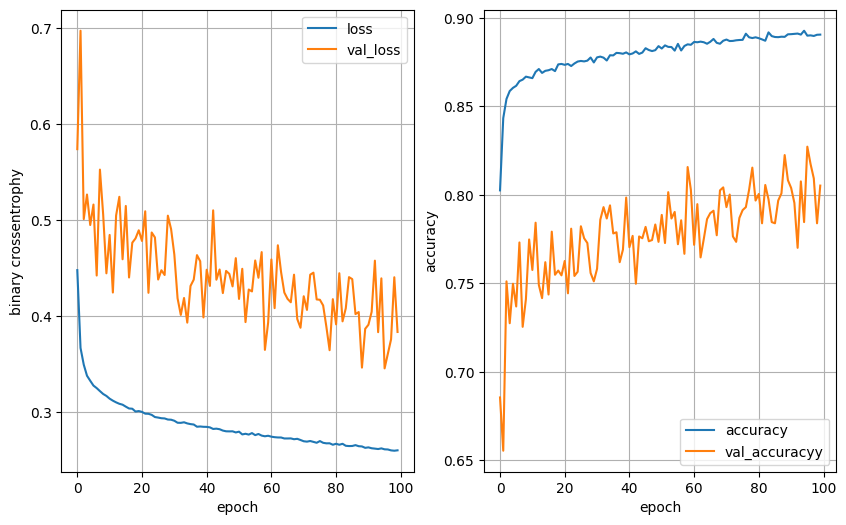

In [52]:
plot_history(history)

In [46]:
def train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
  nn_model=tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation ='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(32, activation ='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',
                 metrics=['accuracy'])
  history=nn_model.fit(x_train,y_train,epochs=epochs, batch_size=batch_size,validation_split=0.2,verbose=0)

  return nn_model, history

In [35]:
epochs=100
for num_nodes in[16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        model, history= train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
        plot_loss(hisrory)
        plot_accuracy(history)

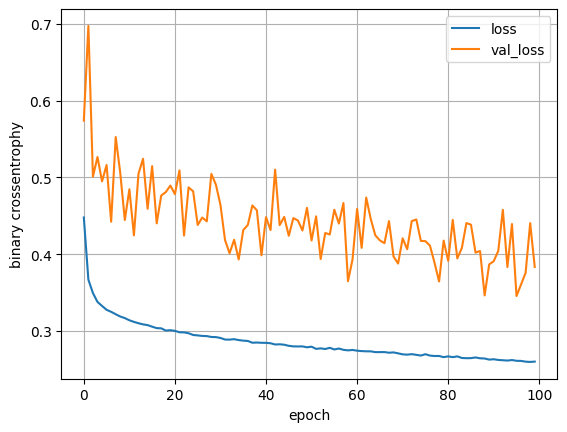

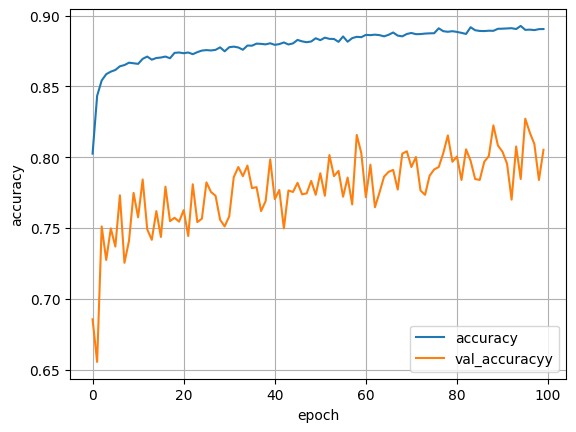